## Equipe : Raul Aquino e Wendell

## Questão 1

In [25]:
# Imports.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Activation, Conv2D, MaxPool2D, Dense
from tensorflow.keras import backend
from sklearn.model_selection import train_test_split

# MNIST

In [2]:
# Import dataset from keras.
from keras.datasets import mnist

# Loading training and test data.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

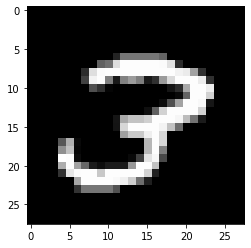

In [4]:
# Exemple.
plt.imshow(X_train[207], cmap='gray')
plt.show()

In [5]:
# Reshaping my CNN entry.
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# As the last layer the number of neurons is proportional to the number of classes I do the onehotencoder to facilitate the understanding of my last layer.
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [6]:
X_train

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


## 👇 Primeira configuração

In [7]:
backend.clear_session()

# Feature extraction stages
model_cnn_1 = Sequential()
model_cnn_1.add(Conv2D(64, (3,3), input_shape=(28, 28, 1), padding=('valid')))
model_cnn_1.add(MaxPool2D(pool_size=(2,2)))
model_cnn_1.add(Activation('relu'))
model_cnn_1.add(Flatten())

# Connected stages (Classification)
model_cnn_1.add(Dense(128, activation='relu'))
model_cnn_1.add(Dense(10, activation='softmax'))

model_cnn_1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Summary of my model.
model_cnn_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
activation (Activation)      (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1384576   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
______________________________________________

In [9]:
# Adding the training to the variable history to be able to plot.
history_1 = model_cnn_1.fit(X_train, y_train_categorical, batch_size=128, epochs=10, verbose=1, validation_split=0.3)

Epoch 1/10
329/329 [==============================] - 21s 61ms/step - loss: 13.0095 - accuracy: 0.7997 - val_loss: 0.1042 - val_accuracy: 0.9698
Epoch 2/10
329/329 [==============================] - 18s 54ms/step - loss: 0.0700 - accuracy: 0.9804 - val_loss: 0.1111 - val_accuracy: 0.9704
Epoch 3/10
329/329 [==============================] - 17s 53ms/step - loss: 0.0300 - accuracy: 0.9906 - val_loss: 0.0954 - val_accuracy: 0.9782
Epoch 4/10
329/329 [==============================] - 18s 56ms/step - loss: 0.0143 - accuracy: 0.9954 - val_loss: 0.1151 - val_accuracy: 0.9776
Epoch 5/10
329/329 [==============================] - 18s 56ms/step - loss: 0.0082 - accuracy: 0.9977 - val_loss: 0.1140 - val_accuracy: 0.9831
Epoch 6/10
329/329 [==============================] - 18s 55ms/step - loss: 0.0071 - accuracy: 0.9981 - val_loss: 0.1363 - val_accuracy: 0.9809
Epoch 7/10
329/329 [==============================] - 18s 55ms/step - loss: 0.0059 - accuracy: 0.9983 - val_loss: 0.1475 - val_accuracy

In [12]:
# Evaluate brings me the accuracy of my model.
results_1 = model_cnn_1.evaluate(X_test, y_test_categorical)
print('Accuracy ',results_1[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.1800 - accuracy: 0.9827
Accuracy  0.982699990272522


Text(0.5, 0, 'Epochs')

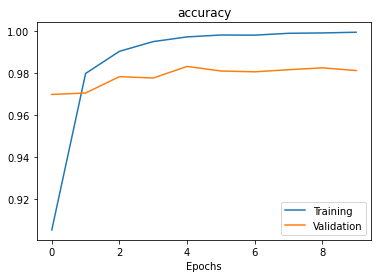

In [13]:
# Plotting the accuracy of training and testing.
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('accuracy')
plt.xlabel('Epochs')

## 👇 Segunda configuração

In [14]:
backend.clear_session()

# Feature extraction stages
model_cnn_2 = Sequential()
model_cnn_2.add(Conv2D(64, (3,3), input_shape=(28, 28, 1), padding=('valid')))
model_cnn_2.add(MaxPool2D(pool_size=(2,2)))
model_cnn_2.add(Activation('relu'))
model_cnn_2.add(Flatten())

# Connected stages (Classification)
model_cnn_2.add(Dense(128, activation='tanh'))
model_cnn_2.add(Dense(2, activation='tanh'))
model_cnn_2.add(Dense(10, activation='softmax'))

model_cnn_2.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model_cnn_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
activation (Activation)      (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1384576   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3

In [16]:
history_2 = model_cnn_2.fit(X_train, y_train_categorical, batch_size=128, epochs=10, verbose=1, validation_split=0.3)

Epoch 1/10
329/329 [==============================] - 16s 47ms/step - loss: 1.9172 - accuracy: 0.3623 - val_loss: 1.7519 - val_accuracy: 0.3958
Epoch 2/10
329/329 [==============================] - 15s 45ms/step - loss: 1.7072 - accuracy: 0.3993 - val_loss: 1.6260 - val_accuracy: 0.3967
Epoch 3/10
329/329 [==============================] - 14s 42ms/step - loss: 1.5974 - accuracy: 0.4019 - val_loss: 1.5408 - val_accuracy: 0.3937
Epoch 4/10
329/329 [==============================] - 14s 42ms/step - loss: 1.5131 - accuracy: 0.4085 - val_loss: 1.4788 - val_accuracy: 0.3965
Epoch 5/10
329/329 [==============================] - 15s 46ms/step - loss: 1.4603 - accuracy: 0.4059 - val_loss: 1.4233 - val_accuracy: 0.4001
Epoch 6/10
329/329 [==============================] - 14s 43ms/step - loss: 1.4105 - accuracy: 0.4064 - val_loss: 1.3844 - val_accuracy: 0.4039
Epoch 7/10
329/329 [==============================] - 14s 42ms/step - loss: 1.3678 - accuracy: 0.4123 - val_loss: 1.3676 - val_accuracy:

In [17]:
results_2 = model_cnn_2.evaluate(X_test, y_test_categorical)
print(results_2[1])

313/313 [==============================] - 2s 5ms/step - loss: 1.2741 - accuracy: 0.4502
0.45019999146461487


Text(0.5, 0, 'Epochs')

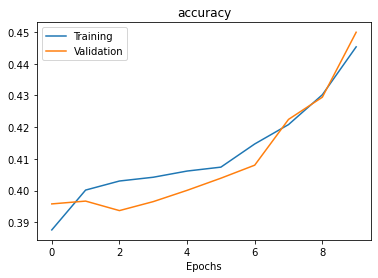

In [18]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('accuracy')
plt.xlabel('Epochs')

# CIFAR10

In [3]:
# Import dataset from keras.
from keras.datasets import cifar10

# Loading training and test data.
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape)
print(X_test.shape)

170500096/170498071 [==============================] - 81s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


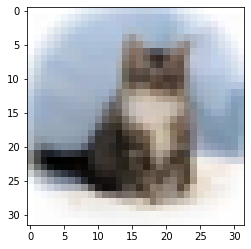

In [5]:
# Exemple.
plt.imshow(X_train[207])
plt.show()

In [7]:
# As the last layer the number of neurons is proportional to the number of classes I do the onehotencoder to facilitate the understanding of my last layer.
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [8]:
# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

## 👇 Primeira configuração

In [32]:
model_cnn_1 = Sequential()
model_cnn_1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_cnn_1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn_1.add(MaxPool2D((2, 2)))
model_cnn_1.add(Flatten())
model_cnn_1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_cnn_1.add(Dense(10, activation='softmax'))
# compile model
model_cnn_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
model_cnn_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,060,138
Trainable params: 1,060,138
Non-trainable params: 0
____________________________________________

In [34]:
history_1 = model_cnn_1.fit(X_train, y_train_categorical, batch_size=128, epochs=10, verbose=1, validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 40s 144ms/step - loss: 1.8669 - accuracy: 0.3426 - val_loss: 1.2846 - val_accuracy: 0.5544
Epoch 2/10
274/274 [==============================] - 37s 134ms/step - loss: 1.1624 - accuracy: 0.5928 - val_loss: 1.1234 - val_accuracy: 0.6105
Epoch 3/10
274/274 [==============================] - 36s 131ms/step - loss: 0.9437 - accuracy: 0.6702 - val_loss: 1.0389 - val_accuracy: 0.6377
Epoch 4/10
274/274 [==============================] - 36s 131ms/step - loss: 0.8109 - accuracy: 0.7204 - val_loss: 1.0547 - val_accuracy: 0.6376
Epoch 5/10
274/274 [==============================] - 36s 132ms/step - loss: 0.7066 - accuracy: 0.7560 - val_loss: 1.0252 - val_accuracy: 0.6534
Epoch 6/10
274/274 [==============================] - 36s 131ms/step - loss: 0.6141 - accuracy: 0.7888 - val_loss: 1.0231 - val_accuracy: 0.6647
Epoch 7/10
274/274 [==============================] - 36s 132ms/step - loss: 0.5153 - accuracy: 0.8231 - val_loss: 1.0126 - val_ac

In [35]:
# Evaluate brings me the accuracy of my model.
results_1 = model_cnn_1.evaluate(X_test, y_test_categorical)
print('Accuracy ',results_1[1])

313/313 [==============================] - 3s 10ms/step - loss: 1.2774 - accuracy: 0.6466
Accuracy  0.6466000080108643


Text(0.5, 0, 'Epochs')

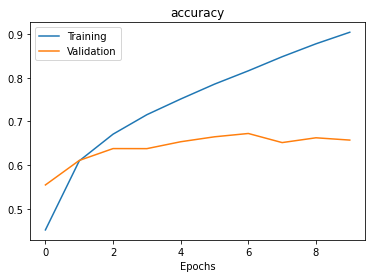

In [36]:
# Plotting the accuracy of training and testing.
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('accuracy')
plt.xlabel('Epochs')

## 👇 Segunda configuração

In [39]:
model_cnn_2 = Sequential()
model_cnn_2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_cnn_2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn_2.add(MaxPool2D((2, 2)))
model_cnn_2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn_2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_cnn_2.add(MaxPool2D((2, 2)))
model_cnn_2.add(Flatten())
model_cnn_2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_cnn_2.add(Dense(10, activation='softmax'))

model_cnn_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
model_cnn_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)             

In [42]:
history_2 = model_cnn_2.fit(X_train, y_train_categorical, batch_size=128, epochs=10, verbose=1, validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 73s 264ms/step - loss: 1.7636 - accuracy: 0.3627 - val_loss: 1.2187 - val_accuracy: 0.5679
Epoch 2/10
274/274 [==============================] - 74s 271ms/step - loss: 1.1008 - accuracy: 0.6115 - val_loss: 1.0979 - val_accuracy: 0.6138
Epoch 3/10
274/274 [==============================] - 71s 258ms/step - loss: 0.8817 - accuracy: 0.6914 - val_loss: 0.9300 - val_accuracy: 0.6754
Epoch 4/10
274/274 [==============================] - 73s 265ms/step - loss: 0.7316 - accuracy: 0.7457 - val_loss: 0.8825 - val_accuracy: 0.6979
Epoch 5/10
274/274 [==============================] - 74s 272ms/step - loss: 0.6153 - accuracy: 0.7844 - val_loss: 0.8431 - val_accuracy: 0.7095
Epoch 6/10
274/274 [==============================] - 71s 258ms/step - loss: 0.4988 - accuracy: 0.8257 - val_loss: 0.9288 - val_accuracy: 0.7015
Epoch 7/10
274/274 [==============================] - 67s 245ms/step - loss: 0.4154 - accuracy: 0.8547 - val_loss: 0.9461 - val_ac

In [43]:
# Evaluate brings me the accuracy of my model.
results_2 = model_cnn_2.evaluate(X_test, y_test_categorical)
print('Accuracy ',results_1[1])

313/313 [==============================] - 6s 18ms/step - loss: 1.2234 - accuracy: 0.7004
Accuracy  0.6466000080108643


Text(0.5, 0, 'Epochs')

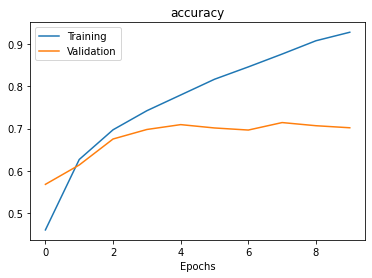

In [44]:
# Plotting the accuracy of training and testing.
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('accuracy')
plt.xlabel('Epochs')